In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import networkx as nx
import numpy as np

In [3]:
nd=pd.read_csv( "https://programminghistorian.org/assets/exploring-and-analyzing-network-data-with-python/quakers_nodelist.csv")
ed=pd.read_csv("https://programminghistorian.org/assets/exploring-and-analyzing-network-data-with-python/quakers_edgelist.csv")

In [4]:
nd

,Name,Historical Significance,Gender,Birthdate,Deathdate,ID
0,Joseph Wyeth,religious writer,male,1663,1731,10013191
1,Alexander Skene of Newtyle,local politician and author,male,1621,1694,10011149
2,James Logan,colonial official and scholar,male,1674,1751,10007567
3,Dorcas Erbery,Quaker preacher,female,1656,1659,10003983
4,Lilias Skene,Quaker preacher and poet,male,1626,1697,10011152
5,William Mucklow,religious writer,male,1630,1713,10008595
6,Thomas Salthouse,Quaker preacher and writer,male,1630,1691,10010643
7,William Dewsbury,Quaker activist,male,1621,1688,10003478
8,John Audland,Quaker preacher,male,1630,1664,10000411
9,Richard Claridge,Quaker minister and schoolmaster,male,1649,1723,10002469


In [12]:
nd.Name.shape

(119,)

In [5]:
ed

,Source,Target
0,George Keith,Robert Barclay
1,George Keith,Benjamin Furly
2,George Keith,Anne Conway Viscountess Conway and Killultagh
3,George Keith,Franciscus Mercurius van Helmont
4,George Keith,William Penn
5,George Keith,George Fox
6,George Keith,George Whitehead
7,George Keith,William Bradford
8,James Parnel,Benjamin Furly
9,James Parnel,Stephen Crisp


In [7]:
ed.shape

(174, 2)

In [8]:
hc=ed[np.logical_or(ed.Source=='William Penn',ed.Target=='William Penn')]
hc

,Source,Target
4,George Keith,William Penn
32,William Bradford,William Penn
39,Isabel Yeamans,William Penn
57,George Fox,William Penn
71,Isaac Norris,William Penn
109,Benjamin Furly,William Penn
111,James Logan,William Penn
114,Edward Haistwell,William Penn
127,George Whitehead,William Penn
134,John Burnyeat,William Penn


In [10]:
hc=hc.append(ed[np.logical_or(ed.Source=='George Keith',ed.Target=='George Keith')])
hc.drop_duplicates().sort_values('Source')
hc

,Source,Target
4,George Keith,William Penn
32,William Bradford,William Penn
39,Isabel Yeamans,William Penn
57,George Fox,William Penn
71,Isaac Norris,William Penn
109,Benjamin Furly,William Penn
111,James Logan,William Penn
114,Edward Haistwell,William Penn
127,George Whitehead,William Penn
134,John Burnyeat,William Penn


In [14]:
tuple_list=(hc.Source+'::'+hc.Target).str.split('::').map(tuple).values

In [16]:
len(tuple_list)

34

In [13]:
G=nx.Graph()

In [17]:
G.add_nodes_from(nd.Name.values)
G.add_edges_from(tuple_list)

In [18]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 119
Number of edges: 25
Average degree:   0.4202


In [20]:
nd.Name

0                    Joseph Wyeth
1      Alexander Skene of Newtyle
2                     James Logan
3                   Dorcas Erbery
4                    Lilias Skene
5                 William Mucklow
6                Thomas Salthouse
7                William Dewsbury
8                    John Audland
9                Richard Claridge
10               William Bradford
11             Fettiplace Bellers
12                   John Bellers
13                 Isabel Yeamans
14         George Fox the younger
15                     George Fox
16                    John Stubbs
17                      Anne Camm
18                      John Camm
19                    Thomas Camm
20                Katharine Evans
21                Lydia Lancaster
22               Samuel Clarridge
23                   Thomas Lower
24                 Gervase Benson
25                  Stephen Crisp
26                James Claypoole
27                   Thomas Holme
28                    John Freame
29            

In [24]:
pd.Series(nd.ID.values, index=nd.Name)[:2]

Name
Joseph Wyeth                  10013191
Alexander Skene of Newtyle    10011149
dtype: int64

In [36]:
hist_sig_dict=pd.Series(nd["Historical Significance"].values,index=nd.Name).to_dict()
gender_dict=pd.Series(nd["Gender"].values,index=nd.Name).to_dict()
birth_dict=pd.Series(nd["Birthdate"].values,index=nd.Name).to_dict()
death_dict=pd.Series(nd["Deathdate"].values,index=nd.Name).to_dict()
id_dict=pd.Series(nd["ID"].values,index=nd.Name).to_dict()


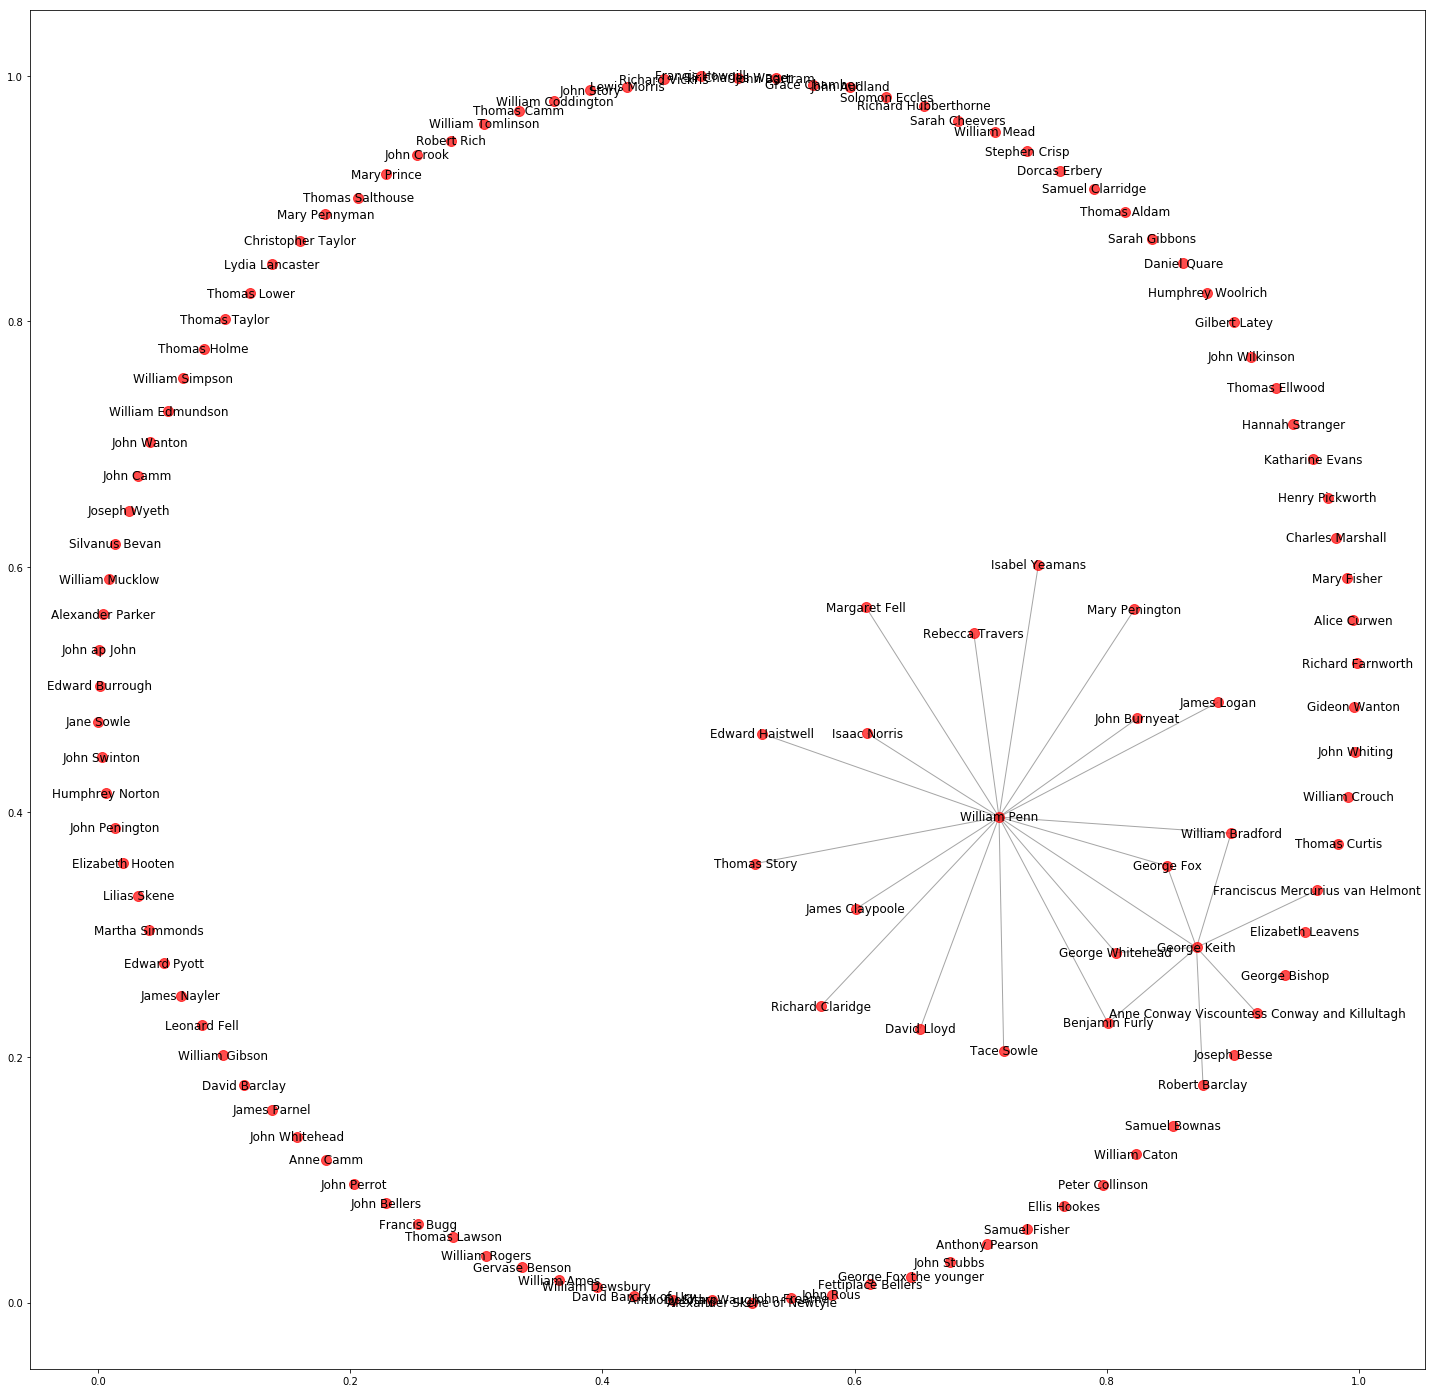

In [55]:
plt.figure(figsize=(25, 25))

nx.draw_networkx(G, with_labels = True, node_size=100, node_color='red', \
                         alpha=0.7, edge_color='grey', width=1)

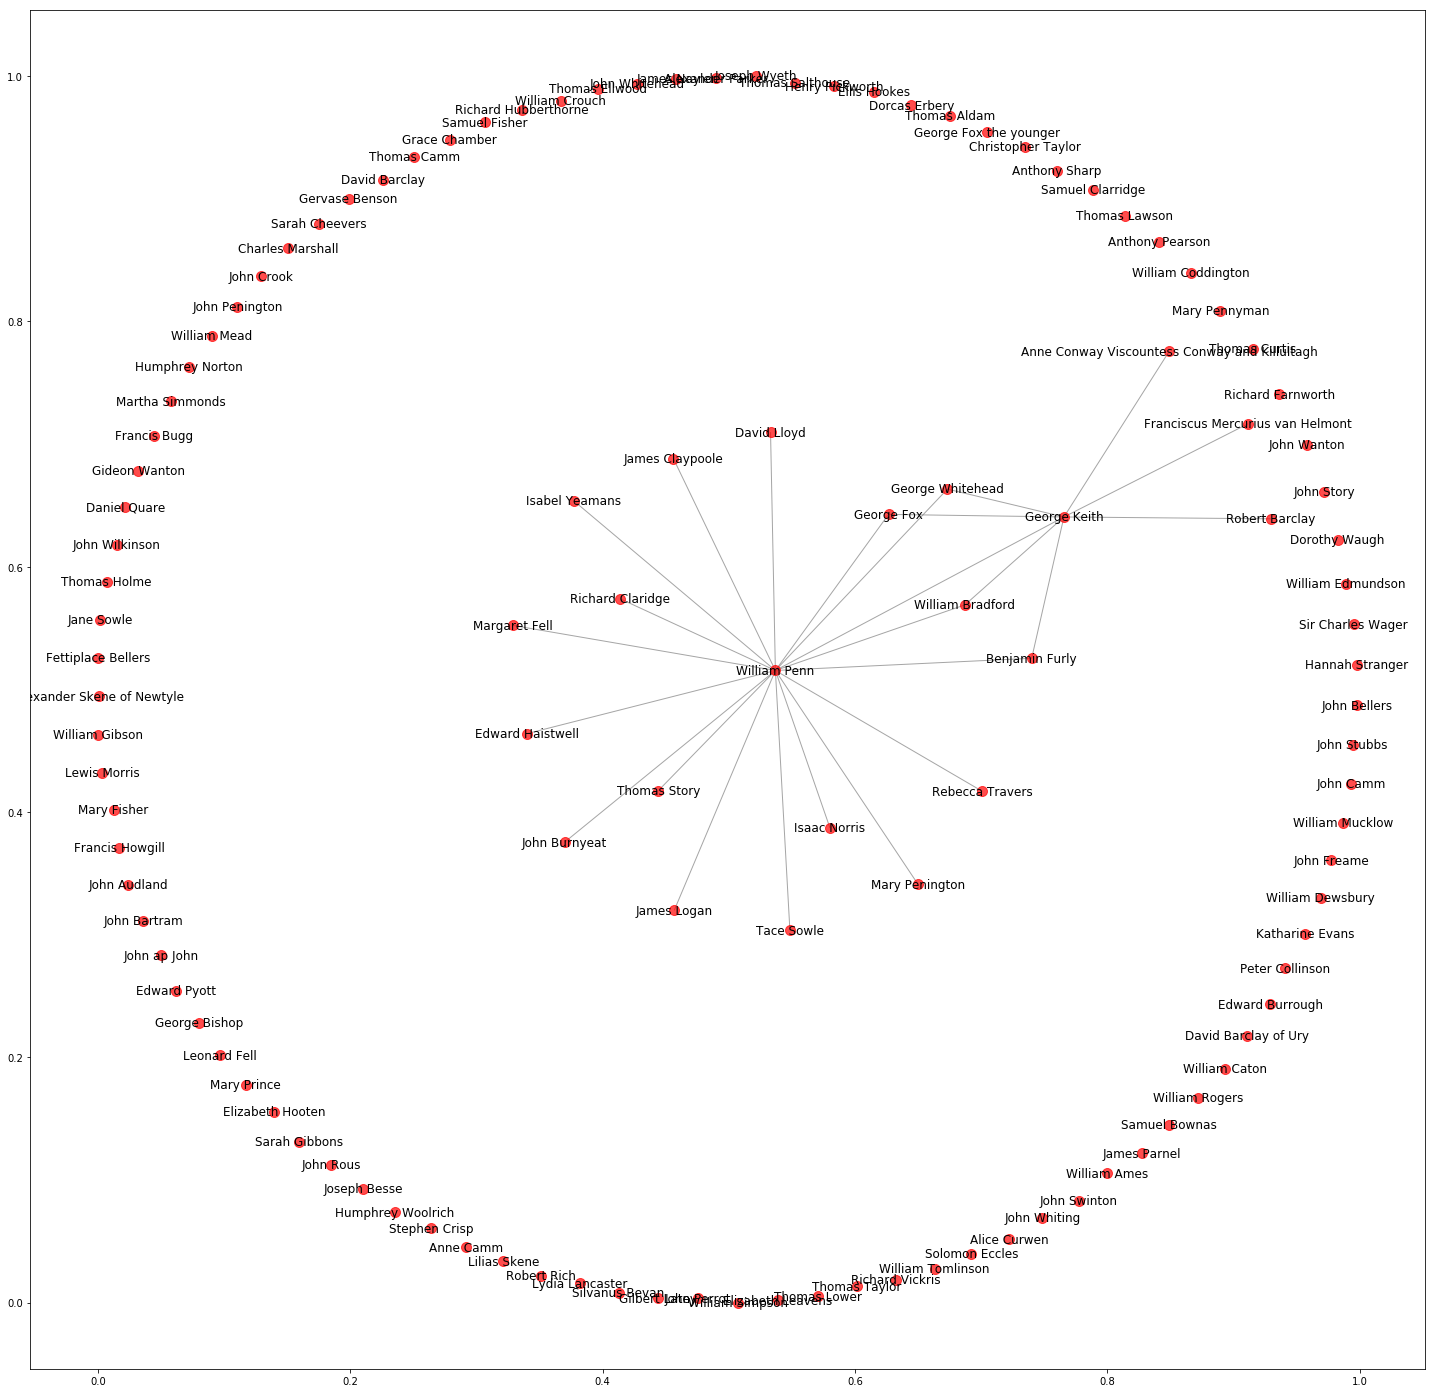

In [54]:
plt.figure(figsize=(25, 25))

nx.draw_networkx(G, with_labels = True, node_size=100, node_color='red', \
                         alpha=0.7, edge_color='grey', width=1)
